# WeatherPy
----

Observeable Trends: 

1. Cities closer to the equator has higher temperatures during this time (09/27/20)

2. There is a strong negative correlation with max temperature and latitude. As we move north from the equator, there is a steady decline in max temperature. 

3. There is no correlation with cloudiness, wind speed, and humidity with respect to latitude. 


In [36]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy
from pprint import pprint 
import matplotlib.pyplot as plt
%matplotlib inline


## Generate Cities List

In [72]:
# Latitudes range from -90 to 90, and longitudes range from -180 to 80.
# Make empty lists to hold random combinations of cities based lat/long and make empty list for cities (unique)
city_random = []
city_unique = []

# Define random lat and long, then zip together. 
lat_random = np.random.uniform(low=-90, high=90, size =1450)
long_random = np.random.uniform(low=-180, high=180, size=1700)
coord_zip = zip(lat_random, long_random)

# Citipy documentation
#>>> from citipy import citipy
#>>> city = citipy.nearest_city(22.99, 120.21)
#>>> city
#<citipy.City instance at 0x1069b6518>
#>>>
#>>> city.city_name     # Tainan, my home town
#'tainan'

# Loop through citipy, check for cities based on coordinate parameters, and store in list
for cities in coord_zip:
    city = citipy.nearest_city(cities[0], cities[1]).city_name
    if city not in city_unique:
        city_unique.append(city)
len(city_unique)


592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
# Define weather URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Loop through citipy unique city list and append cities found in api into new list
weather_lst = []

print(f"Beginning Data Retrievel\n-------------------------------")

for i in range(len(city_unique)):
    try:
        print(f"Processing Record {i} | {city_unique[i]}\n-------------------------------")
        query_url = f"{url}q={city_unique[i]}&units={units}&appid={weather_api_key}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_lst.append(weather_json)
    except (IndexError, KeyError):
        print("City not found. Skipping!")
    
    






Beginning Data Retrievel
-------------------------------
Processing Record 0 | qaqortoq
-------------------------------
Processing Record 1 | kahului
-------------------------------
Processing Record 2 | bucerias
-------------------------------
Processing Record 3 | mitsamiouli
-------------------------------
Processing Record 4 | sorland
-------------------------------
Processing Record 5 | kapaa
-------------------------------
Processing Record 6 | huarmey
-------------------------------
Processing Record 7 | osakarovka
-------------------------------
Processing Record 8 | cape town
-------------------------------
Processing Record 9 | saint george
-------------------------------
Processing Record 10 | mataura
-------------------------------
Processing Record 11 | scottsbluff
-------------------------------
Processing Record 12 | port alfred
-------------------------------
Processing Record 13 | yellowknife
-------------------------------
Processing Record 14 | calvinia
-------------

Processing Record 126 | barrow
-------------------------------
Processing Record 127 | kouroussa
-------------------------------
Processing Record 128 | san cristobal
-------------------------------
Processing Record 129 | homer
-------------------------------
Processing Record 130 | jiroft
-------------------------------
Processing Record 131 | norman wells
-------------------------------
Processing Record 132 | codrington
-------------------------------
Processing Record 133 | aflu
-------------------------------
Processing Record 134 | bathsheba
-------------------------------
Processing Record 135 | acucena
-------------------------------
Processing Record 136 | cockburn town
-------------------------------
Processing Record 137 | winneba
-------------------------------
Processing Record 138 | tawkar
-------------------------------
Processing Record 139 | neiafu
-------------------------------
Processing Record 140 | puerto carreno
-------------------------------
Processing Record 

Processing Record 251 | gebre guracha
-------------------------------
Processing Record 252 | navashino
-------------------------------
Processing Record 253 | tiarei
-------------------------------
Processing Record 254 | arraial do cabo
-------------------------------
Processing Record 255 | cabedelo
-------------------------------
Processing Record 256 | north platte
-------------------------------
Processing Record 257 | carutapera
-------------------------------
Processing Record 258 | nuuk
-------------------------------
Processing Record 259 | dauphin
-------------------------------
Processing Record 260 | sambava
-------------------------------
Processing Record 261 | karaman
-------------------------------
Processing Record 262 | sao raimundo nonato
-------------------------------
Processing Record 263 | georgetown
-------------------------------
Processing Record 264 | menongue
-------------------------------
Processing Record 265 | casablanca
-------------------------------


Processing Record 376 | urengoy
-------------------------------
Processing Record 377 | agadir
-------------------------------
Processing Record 378 | chapais
-------------------------------
Processing Record 379 | lufilufi
-------------------------------
Processing Record 380 | aksarka
-------------------------------
Processing Record 381 | snasa
-------------------------------
Processing Record 382 | liniere
-------------------------------
Processing Record 383 | tefe
-------------------------------
Processing Record 384 | akcaabat
-------------------------------
Processing Record 385 | trelew
-------------------------------
Processing Record 386 | hudson bay
-------------------------------
Processing Record 387 | opuwo
-------------------------------
Processing Record 388 | galveston
-------------------------------
Processing Record 389 | torquay
-------------------------------
Processing Record 390 | rafai
-------------------------------
Processing Record 391 | cambrils
-----------

Processing Record 503 | capim grosso
-------------------------------
Processing Record 504 | lahaina
-------------------------------
Processing Record 505 | glenluce
-------------------------------
Processing Record 506 | rincon
-------------------------------
Processing Record 507 | maku
-------------------------------
Processing Record 508 | brae
-------------------------------
Processing Record 509 | alto araguaia
-------------------------------
Processing Record 510 | west bay
-------------------------------
Processing Record 511 | kletskaya
-------------------------------
Processing Record 512 | icod de los vinos
-------------------------------
Processing Record 513 | andros town
-------------------------------
Processing Record 514 | najran
-------------------------------
Processing Record 515 | helena
-------------------------------
Processing Record 516 | manhuacu
-------------------------------
Processing Record 517 | nortelandia
-------------------------------
Processing Reco

In [46]:
pprint(weather_lst)

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 60.72, 'lon': -46.03},
  'dt': 1601236435,
  'id': 3420846,
  'main': {'feels_like': 36.61,
           'humidity': 41,
           'pressure': 1002,
           'temp': 42.8,
           'temp_max': 42.8,
           'temp_min': 42.8},
  'name': 'Qaqortoq',
  'sys': {'country': 'GL',
          'id': 47,
          'sunrise': 1601197283,
          'sunset': 1601239707,
          'type': 1},
  'timezone': -7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 280, 'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 20.89, 'lon': -156.47},
  'dt': 1601236435,
  'id': 5847411,
  'main': {'feels_like': 77.85,
           'humidity': 54,
           'pressure': 1016,
           'temp': 81.23,
           'temp_max': 84.2,
           'temp_min': 79},
  'n

           'pressure': 1013,
           'temp': 87.39,
           'temp_max': 89.01,
           'temp_min': 84.99},
  'name': 'San Jose',
  'sys': {'country': 'US',
          'id': 5845,
          'sunrise': 1601215201,
          'sunset': 1601258192,
          'type': 1},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'haze',
               'icon': '50d',
               'id': 721,
               'main': 'Haze'}],
  'wind': {'deg': 330, 'speed': 17.22}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 58.57, 'lon': 5.7},
  'dt': 1601236445,
  'id': 3131824,
  'main': {'feels_like': 56.21,
           'humidity': 99,
           'pressure': 1003,
           'temp': 56.34,
           'temp_max': 57,
           'temp_min': 55},
  'name': 'Vigrestad',
  'sys': {'country': 'NO',
          'id': 2034752,
          'sunrise': 1601184808,
          'sunset': 1601227357,
          'type': 3},
  'timezone': 7200,
  'visibility': 10000,
  '

           'humidity': 60,
           'pressure': 1011,
           'temp': 75.4,
           'temp_max': 75.99,
           'temp_min': 75},
  'name': 'Jamestown',
  'sys': {'country': 'US',
          'id': 4588,
          'sunrise': 1601205005,
          'sunset': 1601247921,
          'type': 1},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 200, 'gust': 23.04, 'speed': 14.99}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 39.55, 'lon': -107.32},
  'dt': 1601236257,
  'id': 5423092,
  'main': {'feels_like': 45.99,
           'humidity': 42,
           'pressure': 1029,
           'temp': 57.6,
           'temp_max': 66.2,
           'temp_min': 46.4},
  'name': 'Glenwood Springs',
  'sys': {'country': 'US',
          'id': 3027,
          'sunrise': 1601211724,
          'sunset': 1601254678,
          't

  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 100, 'speed': 8.05}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 43.67, 'lon': -7.41},
  'dt': 1601236459,
  'id': 3125287,
  'main': {'feels_like': 40.01,
           'humidity': 1,
           'pressure': 1020,
           'temp': 48.99,
           'temp_max': 48.99,
           'temp_min': 48.99},
  'name': 'Cervo',
  'sys': {'country': 'ES',
          'id': 2007090,
          'sunrise': 1601187769,
          'sunset': 1601230688,
          'type': 3},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 51, 'speed': 3.29}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 32.67, 'lo

  'coord': {'lat': 10.65, 'lon': -9.88},
  'dt': 1601236466,
  'id': 2418437,
  'main': {'feels_like': 81.41,
           'grnd_level': 968,
           'humidity': 84,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 75.34,
           'temp_max': 75.34,
           'temp_min': 75.34},
  'name': 'Kouroussa',
  'rain': {'1h': 1.63},
  'sys': {'country': 'GN', 'sunrise': 1601188100, 'sunset': 1601231542},
  'timezone': 0,
  'visibility': 10000,
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 186, 'speed': 2.93}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 7.77, 'lon': -72.22},
  'dt': 1601236257,
  'id': 3628473,
  'main': {'feels_like': 91.54,
           'humidity': 38,
           'pressure': 1010,
           'temp': 93.2,
           'temp_max': 93.2,
           'temp_min': 93.2},
  'name': 'San Cristobal',
  'sys': {'co

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 295, 'speed': 6.29}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 50.7, 'lon': -127.42},
  'dt': 1601236474,
  'id': 6111862,
  'main': {'feels_like': 45.19,
           'humidity': 87,
           'pressure': 1028,
           'temp': 53.6,
           'temp_max': 53.6,
           'temp_min': 53.6},
  'name': 'Port Hardy',
  'sys': {'country': 'CA',
          'id': 1011,
          'sunrise': 1601216680,
          'sunset': 1601259368,
          'type': 1},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 120, 'speed': 14.99}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 39.18, 'lon': -84.53},
  'dt': 1601236474,
 

          'id': 8376,
          'sunrise': 1601195762,
          'sunset': 1601239764,
          'type': 1},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 30, 'speed': 6.93}},
 {'base': 'stations',
  'clouds': {'all': 43},
  'cod': 200,
  'coord': {'lat': 39.05, 'lon': -27.98},
  'dt': 1601236482,
  'id': 3372964,
  'main': {'feels_like': 73.81,
           'grnd_level': 1015,
           'humidity': 86,
           'pressure': 1021,
           'sea_level': 1021,
           'temp': 71.15,
           'temp_max': 71.15,
           'temp_min': 71.15},
  'name': 'Lagoa',
  'sys': {'country': 'PT', 'sunrise': 1601192665, 'sunset': 1601235662},
  'timezone': 0,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 359, 's

  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 264, 'speed': 5.75}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 66.66, 'lon': 66.42},
  'dt': 1601236492,
  'id': 1500933,
  'main': {'feels_like': 29.86,
           'grnd_level': 1024,
           'humidity': 75,
           'pressure': 1026,
           'sea_level': 1026,
           'temp': 39.87,
           'temp_max': 39.87,
           'temp_min': 39.87},
  'name': 'Labytnangi',
  'sys': {'country': 'RU', 'sunrise': 1601256972, 'sunset': 1601298813},
  'timezone': 18000,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 308, 'speed': 11.56}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 38.5, 'lon': -77.97},
  'dt': 1601236493,
  'id': 4754972,

 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 54.32, 'lon': -130.32},
  'dt': 1601236498,
  'id': 6113406,
  'main': {'feels_like': 41.05,
           'humidity': 87,
           'pressure': 1012,
           'temp': 55.4,
           'temp_max': 55.4,
           'temp_min': 55.4},
  'name': 'Prince Rupert',
  'sys': {'country': 'CA',
          'id': 883,
          'sunrise': 1601217429,
          'sunset': 1601260010,
          'type': 1},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 140, 'gust': 41.38, 'speed': 26.4}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 63.86, 'lon': -21.15},
  'dt': 1601236498,
  'id': 3413604,
  'main': {'feels_like': 38.8,
           'humidity': 75,
           'pressure': 993,
           'temp': 46.4,
           'temp_max': 46.4,
     

  'wind': {'deg': 144, 'speed': 13.78}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 2.67, 'lon': 72.89},
  'dt': 1601236506,
  'id': 1337607,
  'main': {'feels_like': 89.4,
           'grnd_level': 1009,
           'humidity': 69,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 82.38,
           'temp_max': 82.38,
           'temp_min': 82.38},
  'name': 'Kudahuvadhoo',
  'sys': {'country': 'MV', 'sunrise': 1601254564, 'sunset': 1601298116},
  'timezone': 18000,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 7, 'speed': 2.17}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -20.41, 'lon': 57.7},
  'dt': 1601236506,
  'id': 934322,
  'main': {'feels_like': 70.97,
           'humidity': 83,
           'pressure': 1019,
           'temp': 71.6,
           'temp_max':

 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 36.32, 'lon': 41.88},
  'dt': 1601236513,
  'id': 448149,
  'main': {'feels_like': 71.46,
           'grnd_level': 953,
           'humidity': 21,
           'pressure': 1010,
           'sea_level': 1010,
           'temp': 81.14,
           'temp_max': 81.14,
           'temp_min': 81.14},
  'name': 'Sinjār',
  'sys': {'country': 'IQ', 'sunrise': 1601175865, 'sunset': 1601218938},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 325, 'speed': 12.41}},
 {'cod': '404', 'message': 'city not found'},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -38.55, 'lon': -58.74},
  'dt': 1601236514,
  'id': 3430443,
  'main': {'feels_like': 47.84,
           'humidity': 98,
           'pressure': 1

               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 310, 'speed': 12.75}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': -18.32, 'lon': 47.12},
  'dt': 1601236520,
  'id': 1072849,
  'main': {'feels_like': 59.7,
           'humidity': 87,
           'pressure': 1021,
           'temp': 60.8,
           'temp_max': 60.8,
           'temp_min': 60.8},
  'name': 'Ankazobe',
  'sys': {'country': 'MG',
          'id': 2136,
          'sunrise': 1601174195,
          'sunset': 1601218094,
          'type': 1},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 100, 'speed': 5.82}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 46.53, 'lon': -87.63},
  'dt': 1601236520,
  'id': 5000950,
  'main': {'feels_like': 66.16,
       

 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 22.57, 'lon': 59.53},
  'dt': 1601236527,
  'id': 286245,
  'main': {'feels_like': 81.79,
           'grnd_level': 1006,
           'humidity': 55,
           'pressure': 1007,
           'sea_level': 1007,
           'temp': 83.19,
           'temp_max': 83.19,
           'temp_min': 83.19},
  'name': 'Sur',
  'sys': {'country': 'OM', 'sunrise': 1601171525, 'sunset': 1601214808},
  'timezone': 14400,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 194, 'speed': 12.12}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 12.06, 'lon': -61.75},
  'dt': 1601236527,
  'id': 3579925,
  'main': {'feels_like': 85.84,
           'humidity': 88,
           'pressure': 1008,
           'temp': 78.8,
           'temp_max': 78.8,
           'temp_min': 78.8},
  'name

  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 70, 'speed': 4.7}},
 {'base': 'stations',
  'clouds': {'all': 13},
  'cod': 200,
  'coord': {'lat': 69.22, 'lon': -51.1},
  'dt': 1601236534,
  'id': 3423146,
  'main': {'feels_like': 24.75,
           'humidity': 69,
           'pressure': 1007,
           'temp': 33.8,
           'temp_max': 33.8,
           'temp_min': 33.8},
  'name': 'Ilulissat',
  'sys': {'country': 'GL',
          'id': 165,
          'sunrise': 1601198729,
          'sunset': 1601240694,
          'type': 1},
  'timezone': -7200,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 10, 'speed': 8.05}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 38.89, 'lon': -76.51},
  'dt': 1601236313,
  'id': 436

               'main': 'Clear'}],
  'wind': {'deg': 97, 'gust': 4, 'speed': 1.01}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 43.04, 'lon': 74.71},
  'dt': 1601236540,
  'id': 1524243,
  'main': {'feels_like': 37.98,
           'humidity': 52,
           'pressure': 1019,
           'temp': 44.6,
           'temp_max': 44.6,
           'temp_min': 44.6},
  'name': 'Georgiyevka',
  'sys': {'country': 'KZ',
          'id': 8871,
          'sunrise': 1601254505,
          'sunset': 1601297301,
          'type': 1},
  'timezone': 21600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 70, 'speed': 4.47}},
 {'base': 'stations',
  'clouds': {'all': 7},
  'cod': 200,
  'coord': {'lat': 29.16, 'lon': 16.14},
  'dt': 1601236541,
  'id': 2209055,
  'main': {'feels_like': 82.81,
           'grnd_level': 984,
           'humidity': 16,
  

          'sunset': 1601227179,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 140, 'speed': 4.7}},
 {'base': 'stations',
  'clouds': {'all': 69},
  'cod': 200,
  'coord': {'lat': 3.38, 'lon': -59.8},
  'dt': 1601236548,
  'id': 3379316,
  'main': {'feels_like': 94.66,
           'grnd_level': 997,
           'humidity': 52,
           'pressure': 1006,
           'sea_level': 1006,
           'temp': 90.09,
           'temp_max': 90.09,
           'temp_min': 90.09},
  'name': 'Lethem',
  'rain': {'1h': 7.7198},
  'sys': {'country': 'GY', 'sunrise': 1601200026, 'sunset': 1601243572},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'heavy intensity rain',
               'icon': '10d',
               'id': 502,
               'main': 'Rain'}],
  'wind': {'deg': 107, 'speed': 5.48}},
 {'

 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 53.26, 'lon': 19.4},
  'dt': 1601236556,
  'id': 3102627,
  'main': {'feels_like': 53.02,
           'humidity': 87,
           'pressure': 1011,
           'temp': 54,
           'temp_max': 54,
           'temp_min': 54},
  'name': 'Brodnica',
  'sys': {'country': 'PL',
          'id': 2005111,
          'sunrise': 1601181437,
          'sunset': 1601224154,
          'type': 3},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 129, 'gust': 8.99, 'speed': 1.99}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 37.72, 'lon': -25.43},
  'dt': 1601236556,
  'id': 3372472,
  'main': {'feels_like': 73.49,
           'humidity': 83,
           'pressure': 1021,
           'temp': 71.6,
           'temp_max': 71.6,
           'tem

               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 22, 'speed': 4.83}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 58.97, 'lon': -3.3},
  'dt': 1601236563,
  'id': 2636638,
  'main': {'feels_like': 35.33,
           'humidity': 93,
           'pressure': 1013,
           'temp': 41,
           'temp_max': 41,
           'temp_min': 41},
  'name': 'Stromness',
  'sys': {'country': 'GB',
          'id': 1437,
          'sunrise': 1601186978,
          'sunset': 1601229506,
          'type': 1},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 170, 'speed': 5.82}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 9.23, 'lon': -78.02},
  'dt': 1601236563,
  'id': 3714956,
  'main': {'feels_like': 87.48,
           

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
# Create DF and append columns
city_df = pd.DataFrame()
city_df["City"] = ""
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""



In [48]:

# Loop through list and append city/ info, and add exception handing 
for city in range(len(city_unique)): 
    try:
        city_df.loc[city, "City"] = weather_lst[city]["name"]
        city_df.loc[city, "Lat"] = weather_lst[city]["coord"]["lat"]
        city_df.loc[city, "Lng"] = weather_lst[city]["coord"]["lon"]
        city_df.loc[city, "Max Temp"] = weather_lst[city]["main"]["temp_max"]
        city_df.loc[city, "Humidity"] = weather_lst[city]["main"]["humidity"]
        city_df.loc[city, "Cloudiness"] = weather_lst[city]["clouds"]["all"]
        city_df.loc[city, "Wind Speed"] = weather_lst[city]["wind"]["speed"]
        city_df.loc[city, "Country"] = weather_lst[city]["sys"]["country"]
        city_df.loc[city, "Date"] = weather_lst[city]["dt"]
            
        
    except (IndexError, KeyError):
        pass 
city_df.head()     

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaqortoq,60.72,-46.03,42.8,41,0,2.24,GL,1601236435
1,Kahului,20.89,-156.47,84.2,54,20,13.87,US,1601236435
2,Bucerías,20.75,-105.33,89.01,70,20,9.17,MX,1601236436
3,Mitsamiouli,-11.38,43.28,76.69,77,11,14.07,KM,1601236436
4,Sørland,67.67,12.69,46.4,52,9,5.82,NO,1601236436


In [49]:
city_df.to_csv("output/city_weather_data.csv")

In [50]:
describe_df = pd.DataFrame({"Lat":city_df["Lat"].astype(float),
                            "Lng": city_df["Lng"].astype(float),
                            "Max Temp": city_df["Max Temp"].astype(float),
                            "Humidity": city_df["Humidity"].astype(float),
                            "Cloudiness": city_df["Cloudiness"].astype(float),
                            "Wind Speed": city_df["Wind Speed"].astype(float),
                            "Date": city_df["Date"].astype(float),
                            
                           })
describe_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,4.910000e+02
mean,20.493809,-25.714847,68.373055,66.295316,42.841141,8.681365,1.601236e+09
std,31.935472,68.115287,16.830670,22.554704,37.862631,5.608113,7.307564e+01
min,-54.800000,-175.200000,14.040000,1.000000,0.000000,0.180000,1.601236e+09
25%,-4.900000,-75.690000,53.665000,55.000000,1.000000,4.595000,1.601236e+09
50%,21.440000,-16.710000,71.600000,70.000000,40.000000,7.230000,1.601236e+09
75%,47.130000,27.160000,81.050000,83.000000,78.500000,12.000000,1.601237e+09
max,78.220000,168.860000,99.190000,100.000000,100.000000,28.860000,1.601237e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

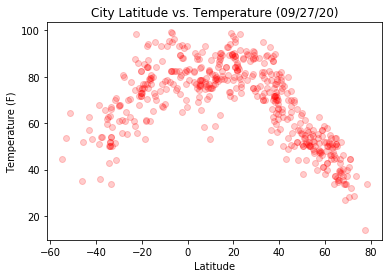

In [89]:
plt.plot(city_df["Lat"], city_df["Max Temp"], "o", color="red", alpha =0.2)
plt.title("City Latitude vs. Temperature (09/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("output/lat_vs_temp.png")

## Latitude vs. Humidity Plot

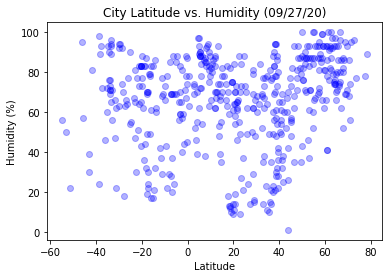

In [90]:
plt.plot(city_df["Lat"], city_df["Humidity"], "o", color="blue", alpha =0.3)
plt.title("City Latitude vs. Humidity (09/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output/lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

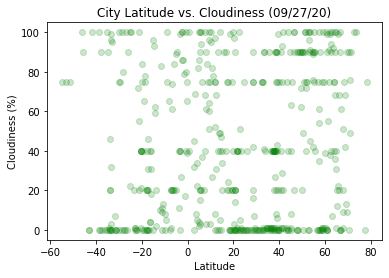

In [91]:
plt.plot(city_df["Lat"], city_df["Cloudiness"], "o", color="green", alpha =0.2)
plt.title("City Latitude vs. Cloudiness (09/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output/lat_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

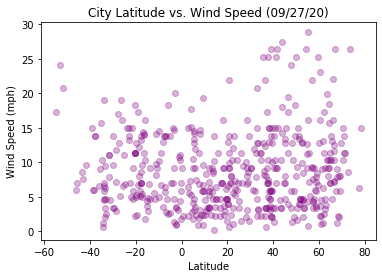

In [92]:
plt.plot(city_df["Lat"], city_df["Wind Speed"], "o", color="purple", alpha =0.3)
plt.title("City Latitude vs. Wind Speed (09/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output/lat_vs_wind.png")

## Linear Regression

In [103]:
# Create a Northern and Southern Hemisphere by separating data set  by Lat

northern_df = city_df.loc[(city_df["Lat"].astype(float)  >= 0)]
southern_df = city_df.loc[(city_df["Lat"].astype(float) <= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6823592861354643


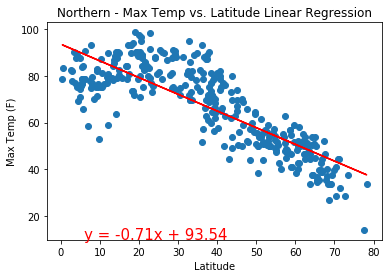

In [117]:
x_values = northern_df["Lat"].astype(float)
y_values = northern_df["Max Temp"].astype(float)
plt.scatter(x_values,y_values)
plt.title('Northern - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/linreg_nothern_maxtemp.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5196380515883618


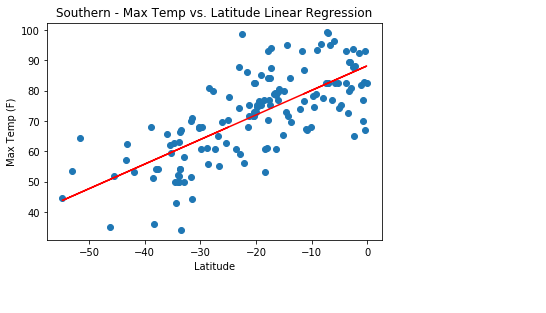

In [118]:
x_values = southern_df["Lat"].astype(float)
y_values = southern_df["Max Temp"].astype(float)
plt.scatter(x_values,y_values)
plt.title('Southern - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/linreg_southern_maxtemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04445167947090515


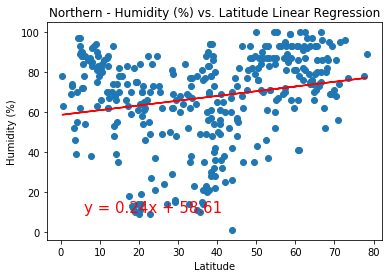

In [122]:
x_values = northern_df["Lat"].astype(float)
y_values = northern_df["Humidity"].astype(float)
plt.scatter(x_values,y_values)
plt.title('Northern - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/linreg_nothern_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00892005407706721


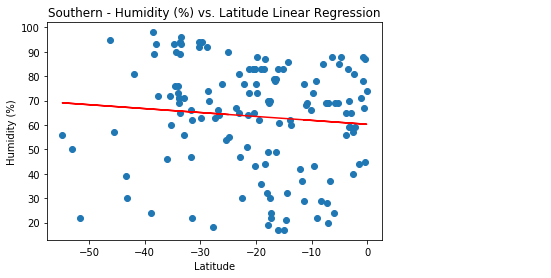

In [123]:
x_values = southern_df["Lat"].astype(float)
y_values = southern_df["Humidity"].astype(float)
plt.scatter(x_values,y_values)
plt.title('Southern - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/linreg_southern_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012377320685159884


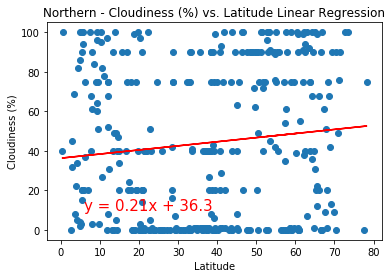

In [124]:
x_values = northern_df["Lat"].astype(float)
y_values = northern_df["Cloudiness"].astype(float)
plt.scatter(x_values,y_values)
plt.title('Northern - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/linreg_nothern_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009358581927269791


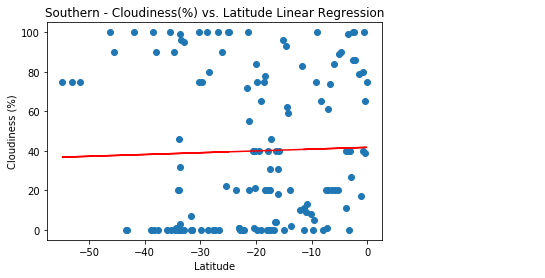

In [125]:
x_values = southern_df["Lat"].astype(float)
y_values = southern_df["Cloudiness"].astype(float)
plt.scatter(x_values,y_values)
plt.title('Southern - Cloudiness(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/linreg_southern_cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0400208936201262


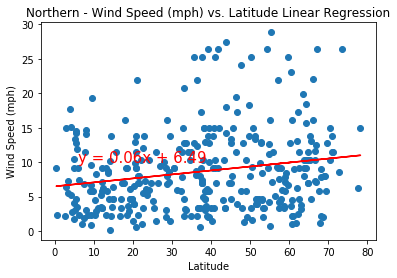

In [126]:
x_values = northern_df["Lat"].astype(float)
y_values = northern_df["Wind Speed"].astype(float)
plt.scatter(x_values,y_values)
plt.title('Northern - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/linreg_nothern_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028479064142499882


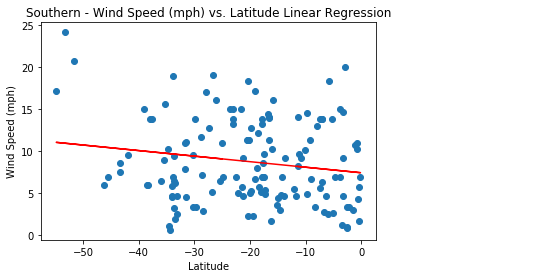

In [127]:
x_values = southern_df["Lat"].astype(float)
y_values = southern_df["Wind Speed"].astype(float)
plt.scatter(x_values,y_values)
plt.title('Southern - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/linreg_southern_wind.png")